In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('To_Use_data.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,rice
1,78,21,20,21.770462,80.319644,7.038096,226.655537,rice
2,92,31,34,23.004459,82.320763,7.840207,263.964248,rice
3,98,38,45,26.491096,80.158363,6.980401,242.864034,rice
4,79,53,43,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [8]:
dummm = df.copy()
df['label'] = df['label'].map(labels_map)

<Axes: xlabel='label', ylabel='count'>

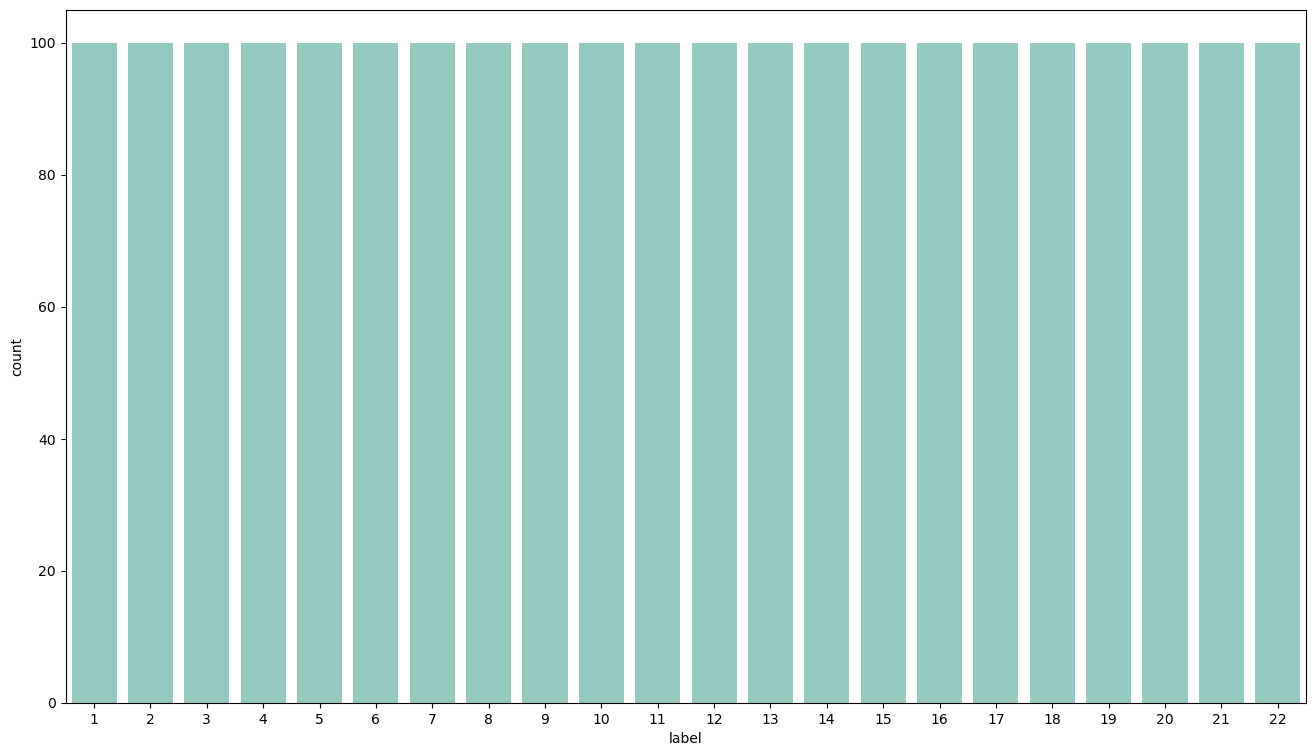

In [9]:
sn.set_palette('Set3')
plt.figure(figsize=(16,9))
sn.countplot(data=df,x = 'label')

In [10]:
import scipy.stats as stats

In [11]:
def visualise(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color = 'pink')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color = 'pink')
    
    plt.show()

 Statistical plots for : N is shown ↓


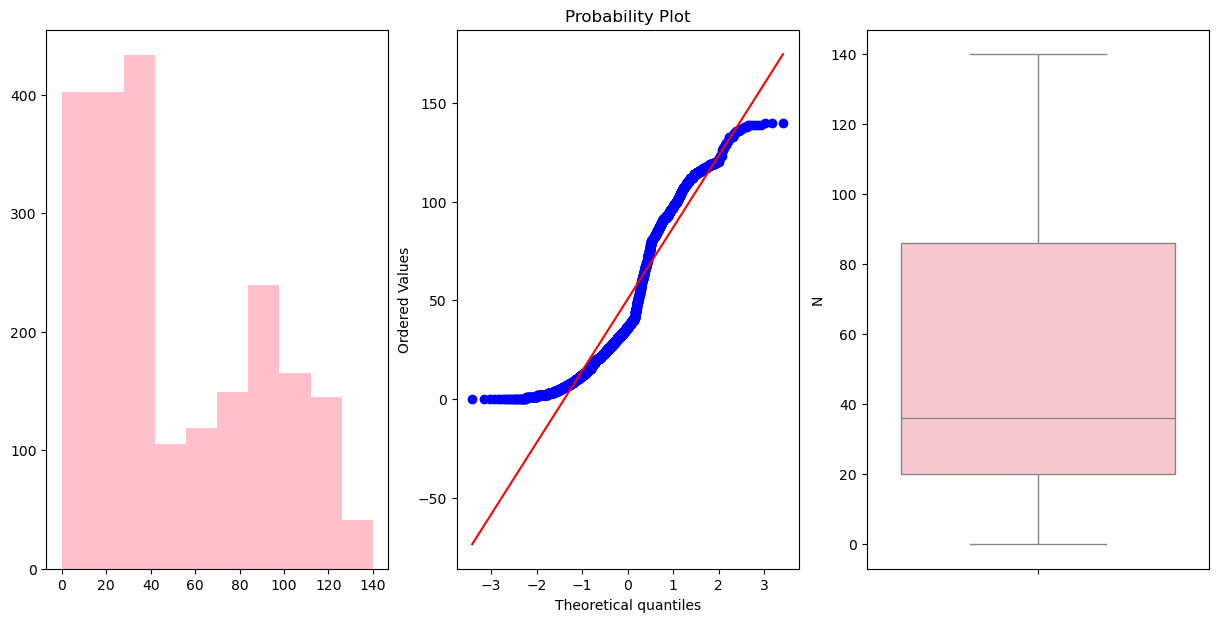

------------------------------------------------------------
 Statistical plots for : P is shown ↓


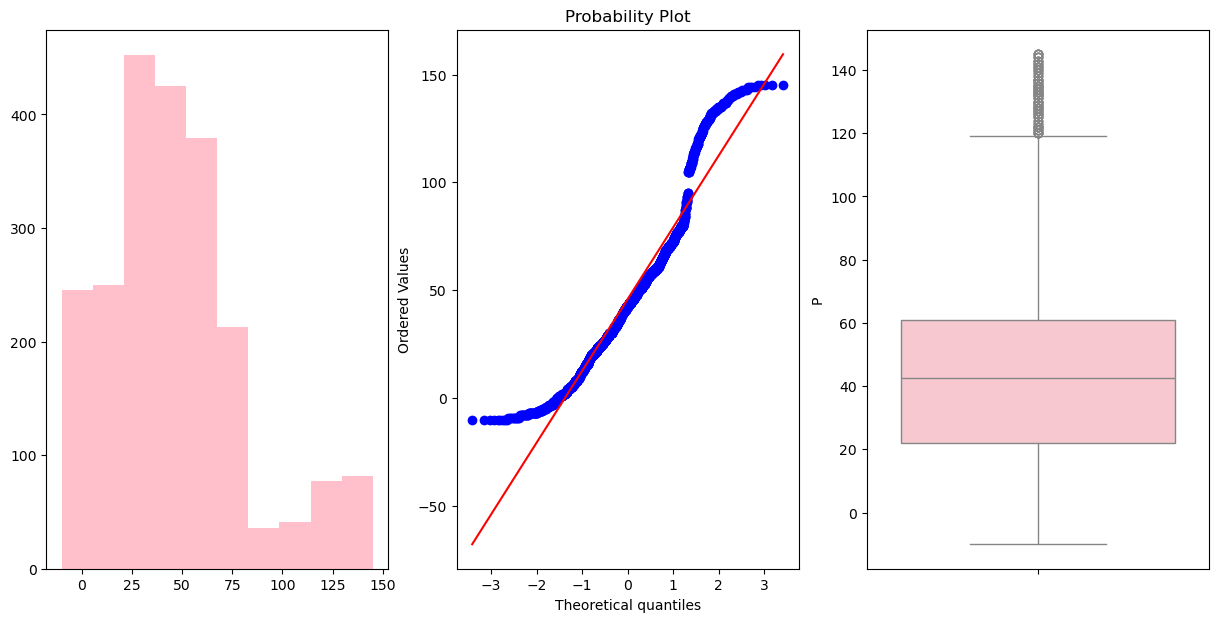

------------------------------------------------------------
 Statistical plots for : K is shown ↓


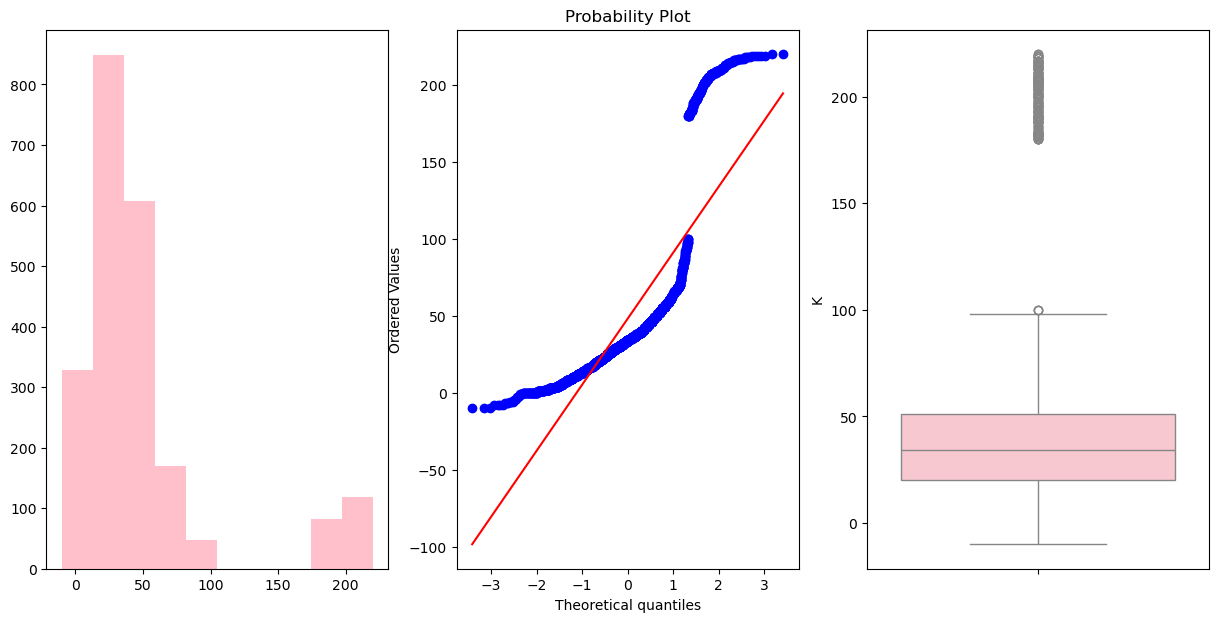

------------------------------------------------------------
 Statistical plots for : temperature is shown ↓


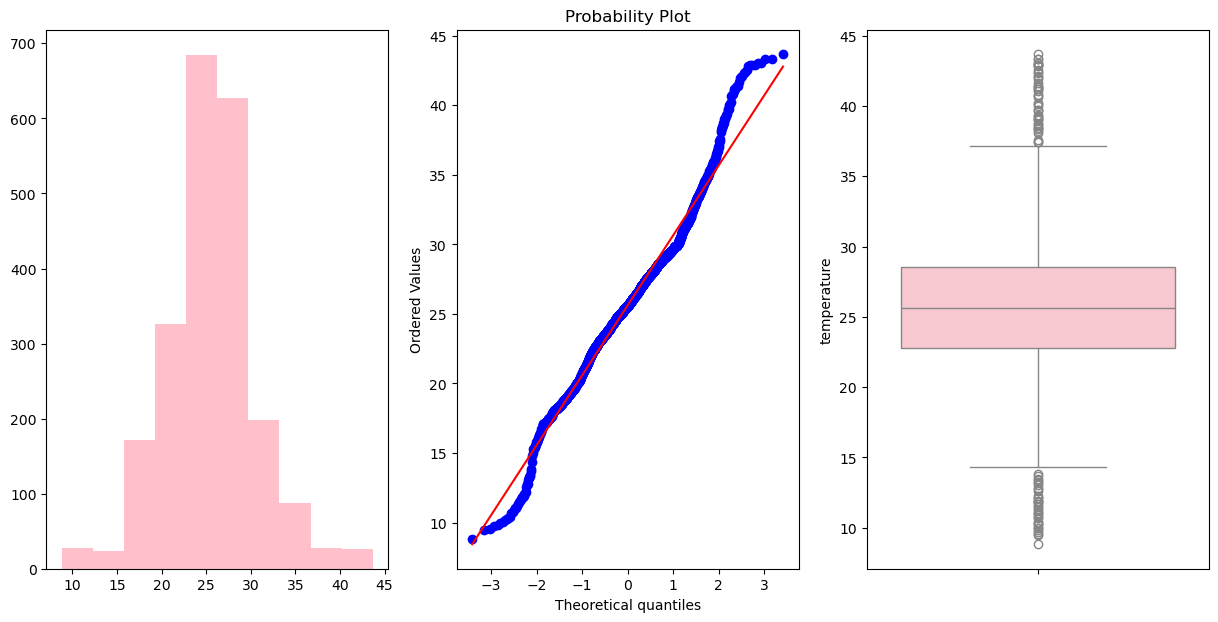

------------------------------------------------------------
 Statistical plots for : humidity is shown ↓


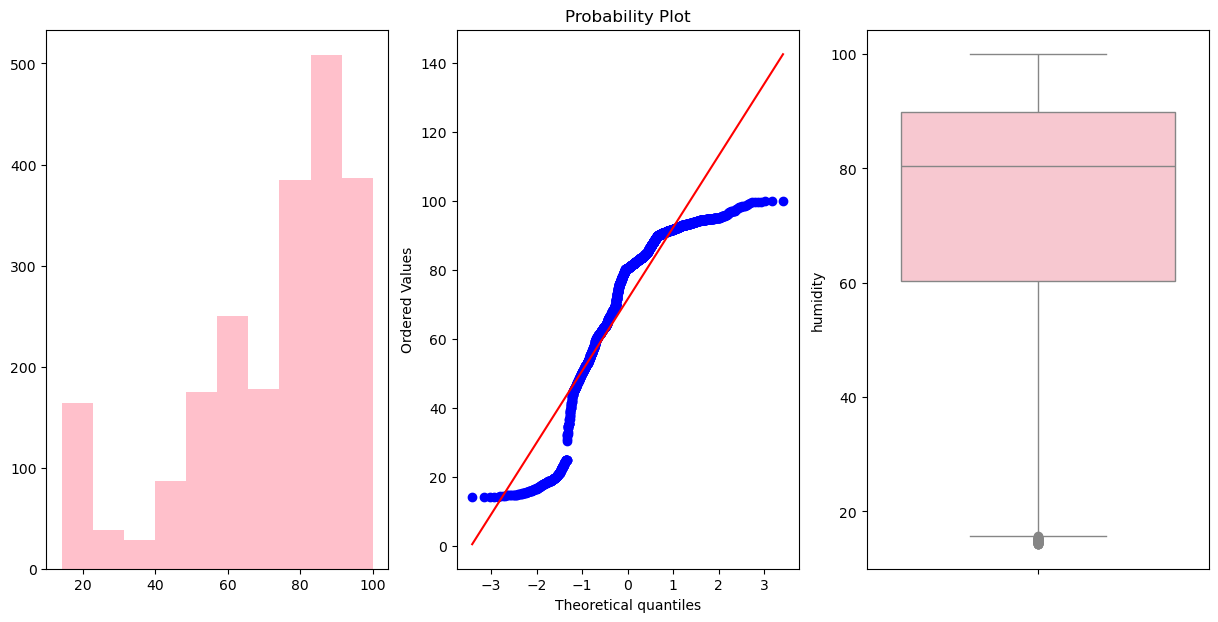

------------------------------------------------------------
 Statistical plots for : ph is shown ↓


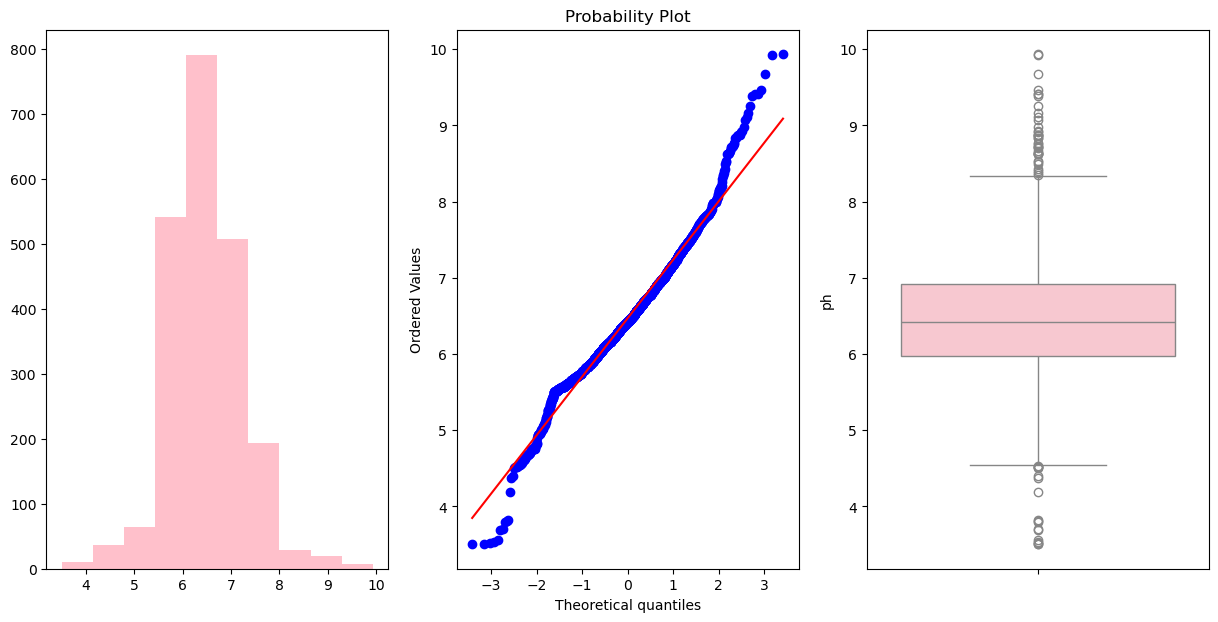

------------------------------------------------------------
 Statistical plots for : rainfall is shown ↓


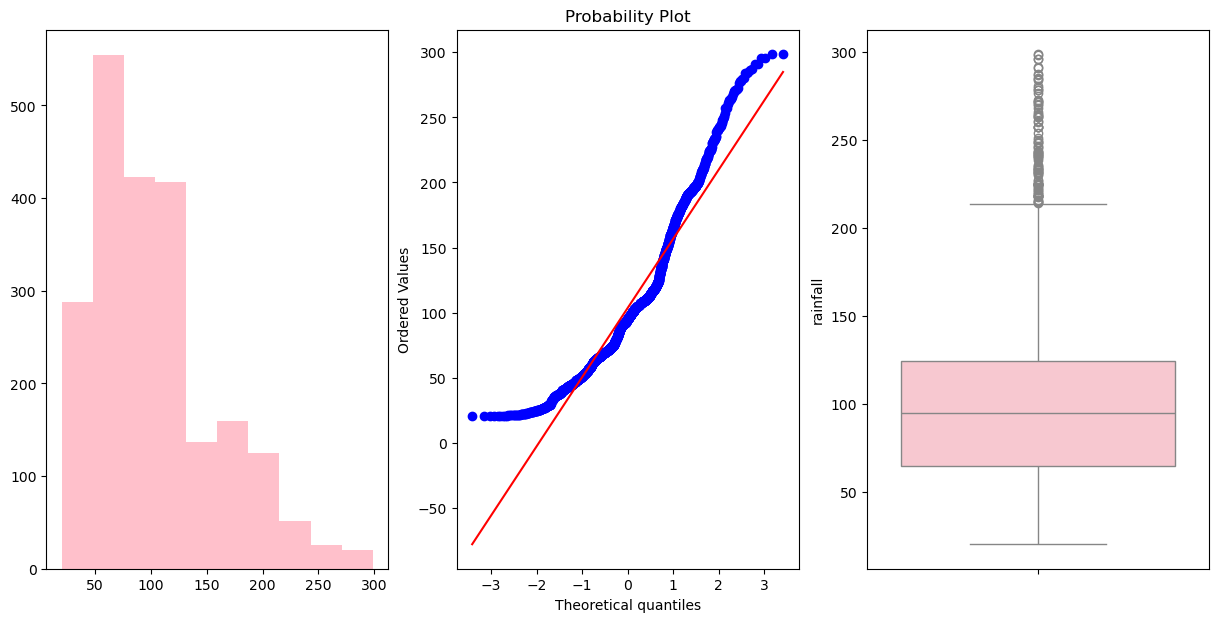

------------------------------------------------------------


In [12]:
for i in df.columns[:-1]:
    print(f' Statistical plots for : {i} is shown ↓')
    visualise(df,i)
    print("-"*60)

In [13]:
temp = df.copy()

In [14]:
upper_list = []
lower_list = []

for i in temp.columns[:-1]:
    upper_list.append(df[i].mean()+(df[i].std())*3)
    lower_list.append(df[i].mean()-(df[i].std())*3)
    

In [15]:
j = 0
for i in temp.columns[:-1]:
    dummy = temp[(temp[i]>upper_list[j])|(temp[i]<lower_list[j])];j+=1

Outlier Removal using IQR technique

In [16]:
def quantile(df,val):
    a = []
    df_upper_limit = df[val].quantile(0.75)
    df_lower_limit = df[val].quantile(0.25)
    iqr = df_upper_limit-df_lower_limit
    upper_limit = float(df_upper_limit+(iqr)*1.5)
    lower_limit = float(df_lower_limit-(iqr)*1.5)
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
            
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a
            

In [17]:
temp = df.copy()
temp['N'] = quantile(temp,'N')
temp['P'] = quantile(temp,'P')
temp['K'] = quantile(temp,'K')
temp['temperature'] = quantile(temp,'temperature')
temp['humidity'] = quantile(temp,'humidity')
temp['ph'] = quantile(temp,'ph')
temp['rainfall'] = quantile(temp,'rainfall')
temp.head()

/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
1,78,21.0,20.0,21.770462,80.319644,7.038096,NaN,1
2,92,31.0,34.0,23.004459,82.320763,7.840207,NaN,1
3,98,38.0,45.0,26.491096,80.158363,6.980401,NaN,1
4,79,53.0,43.0,20.130175,81.604873,7.628473,NaN,1


In [18]:
temp = temp.dropna()
temp.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

 Statistical plots for N is shown ↓


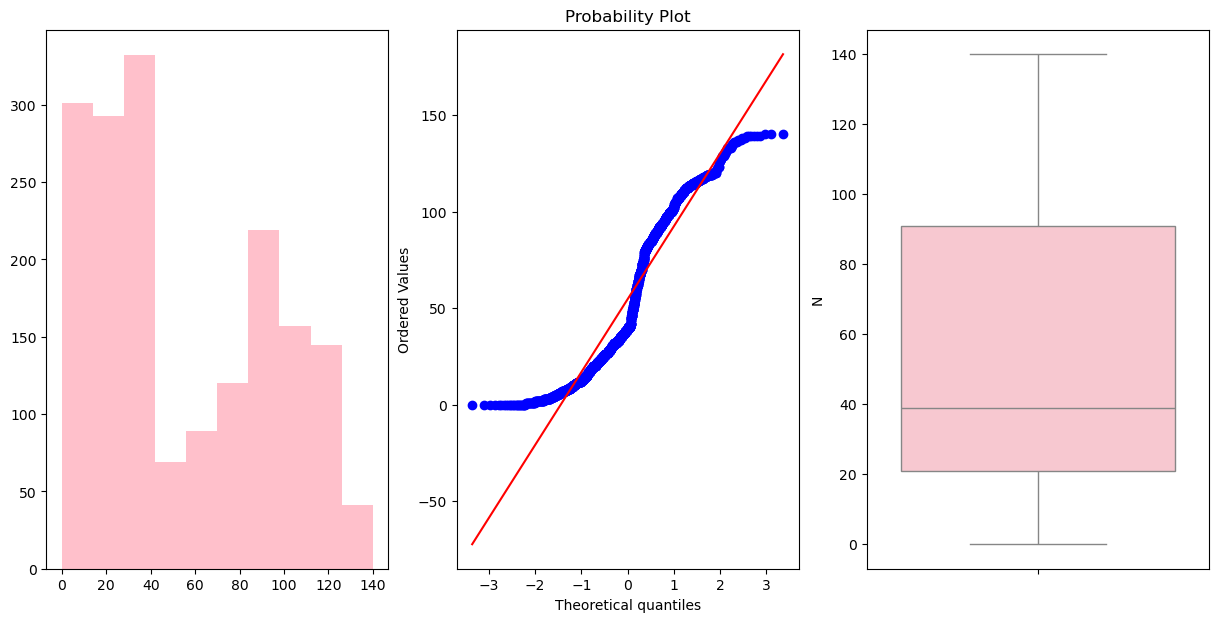

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for P is shown ↓


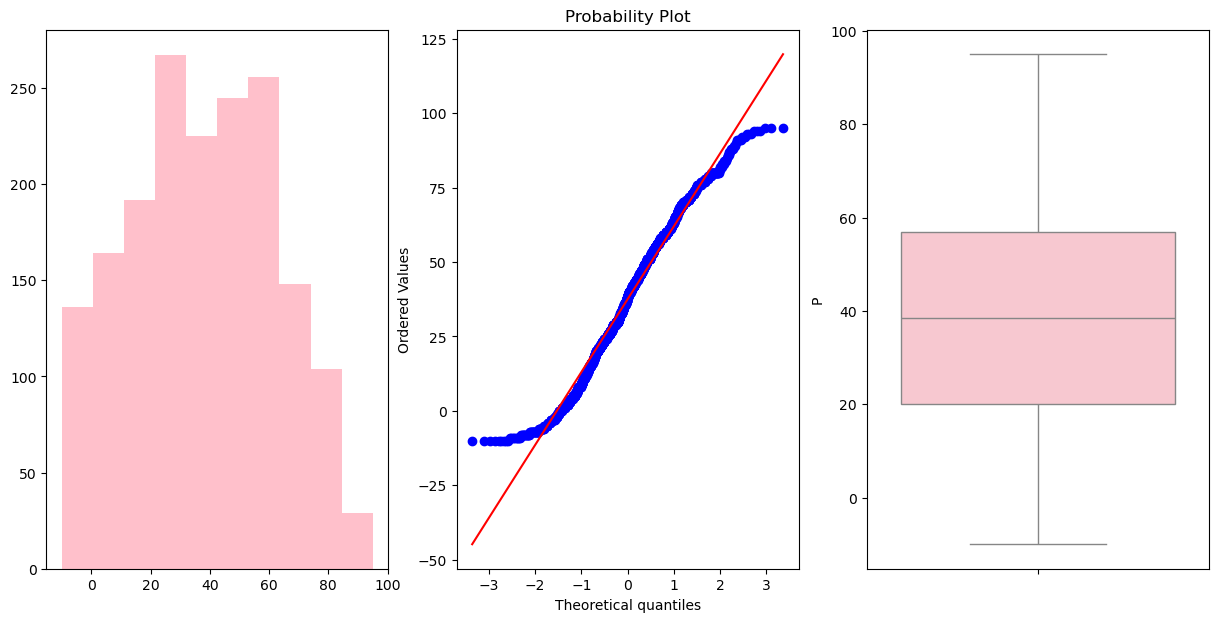

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for K is shown ↓


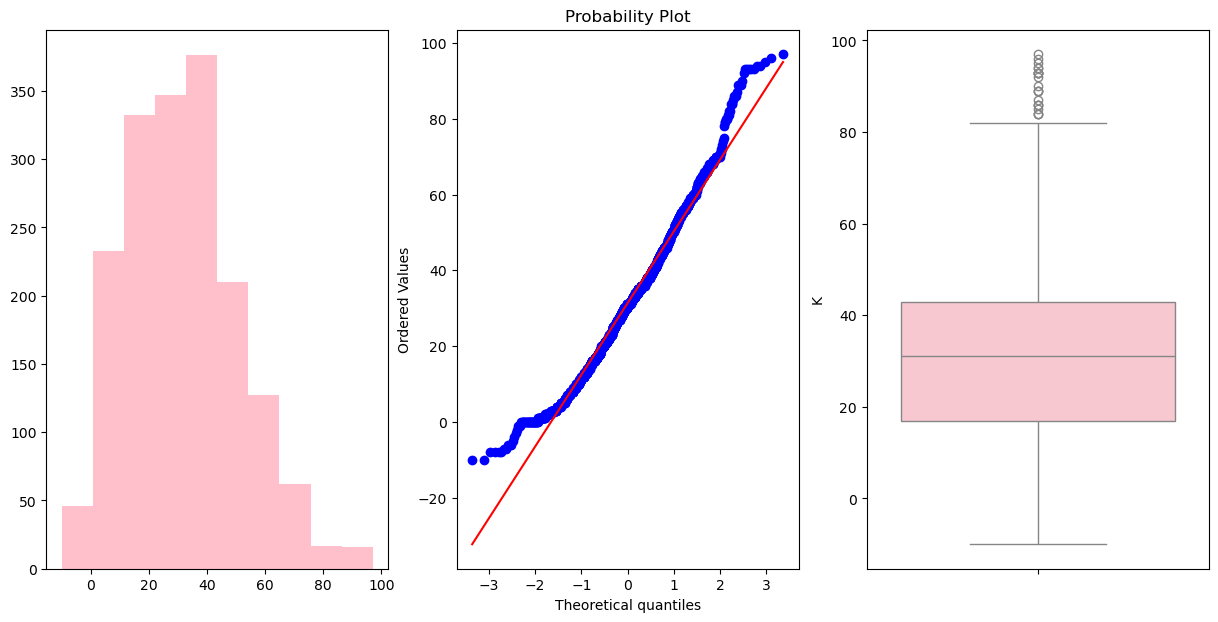

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for temperature is shown ↓


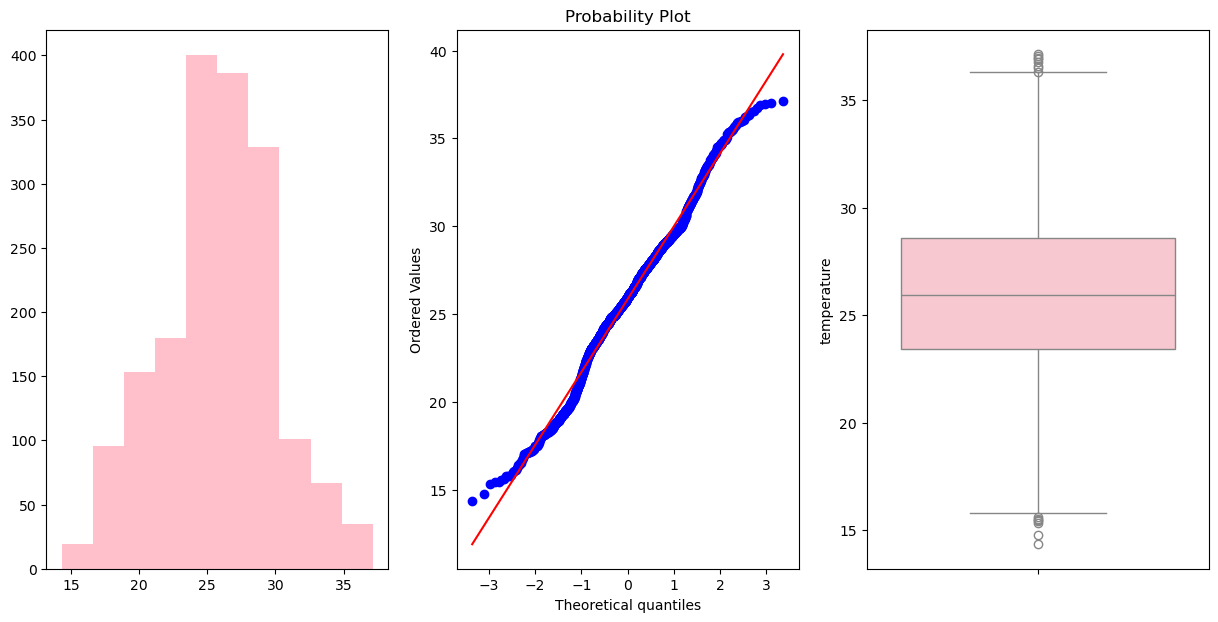

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for humidity is shown ↓


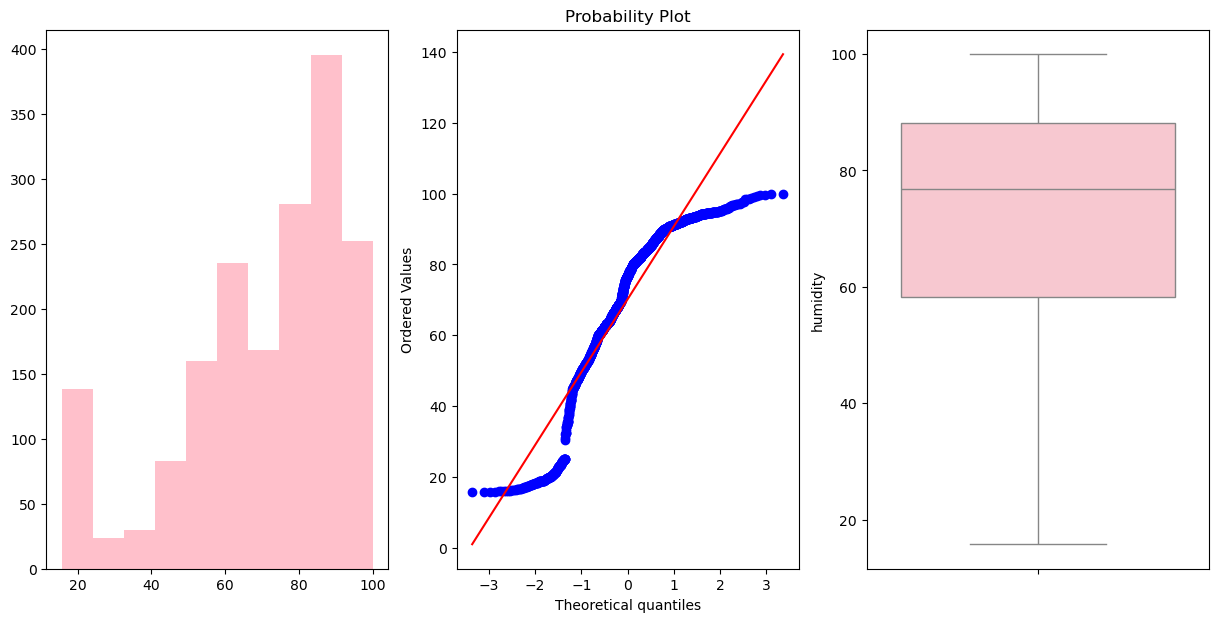

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for ph is shown ↓


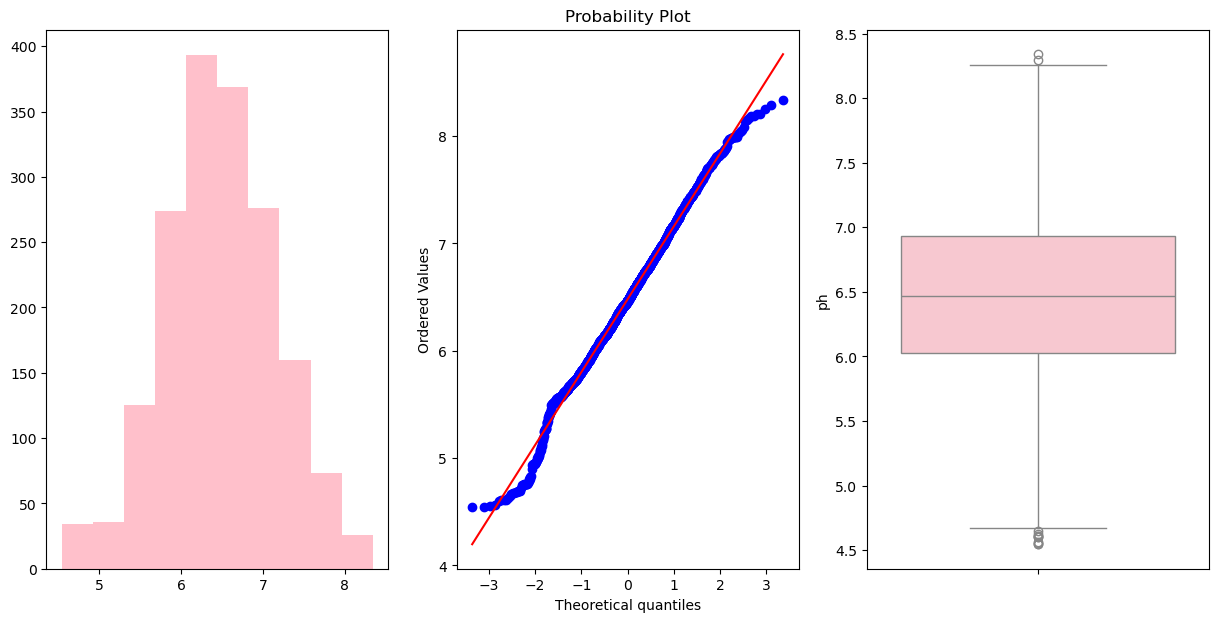

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for rainfall is shown ↓


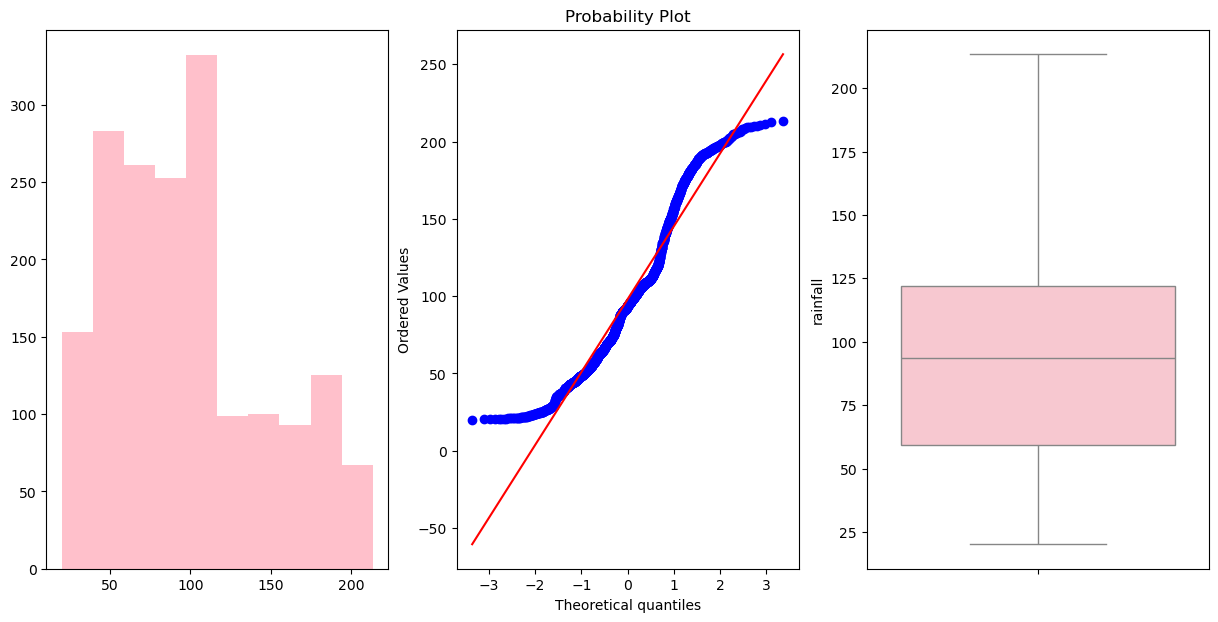

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [19]:
for i in temp.columns[:-1]:
    print(f' Statistical plots for {i} is shown ↓')
    visualise(temp,i)
    print("=>"*50)

((array([-3.41834386, -3.16906693, -3.03090347, ...,  3.03090347,
          3.16906693,  3.41834386]),
  array([ 0.        ,  0.        ,  0.        , ..., 15.52214998,
         15.52214998, 15.52214998])),
 (3.837017624245709, 8.60900074072838, 0.9809808425996116))

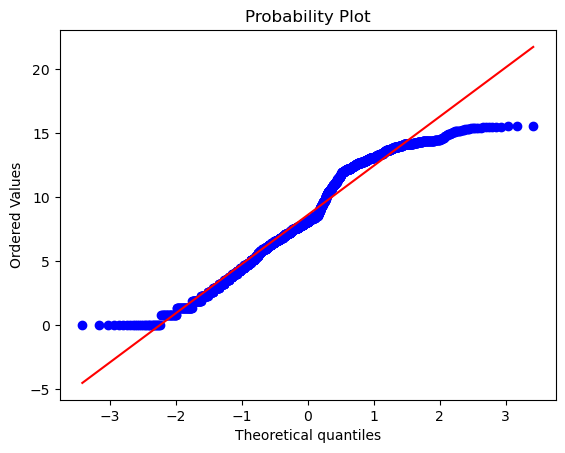

In [20]:
data = df.copy()
data['N'],params = stats.boxcox(data['N']+1)
stats.probplot(data['N'],dist='norm',plot=plt)

((array([-3.35808769, -3.10465012, -2.96393634, ...,  2.96393634,
          3.10465012,  3.35808769]),
  array([ 0.        ,  0.        ,  0.        , ..., 61.43841876,
         61.43841876, 61.43841876])),
 (16.513977488284297, 26.888120897929973, 0.9652035685212718))

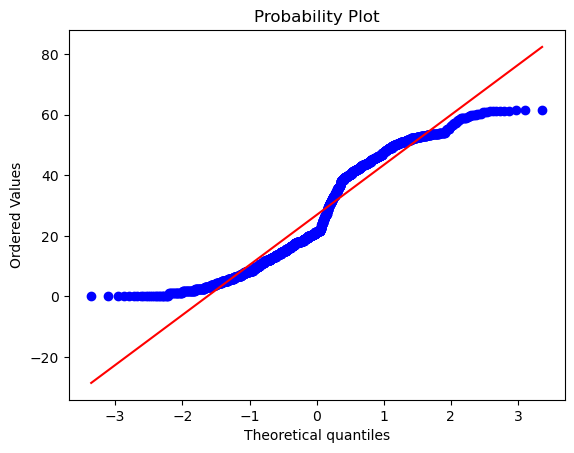

In [21]:
data = temp.copy()
data['N'] = data.N**(1/1.2)
stats.probplot(data['N'],dist='norm',plot=plt)

In [22]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 79.1 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 43.2 MB/s eta 0:00:00:00:0100:01


In [23]:
from sklearnex import patch_sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [24]:
test = temp['label']
train = temp.drop(['label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

In [25]:
# Impute missing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [26]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Statistical plots for N are shown ↓


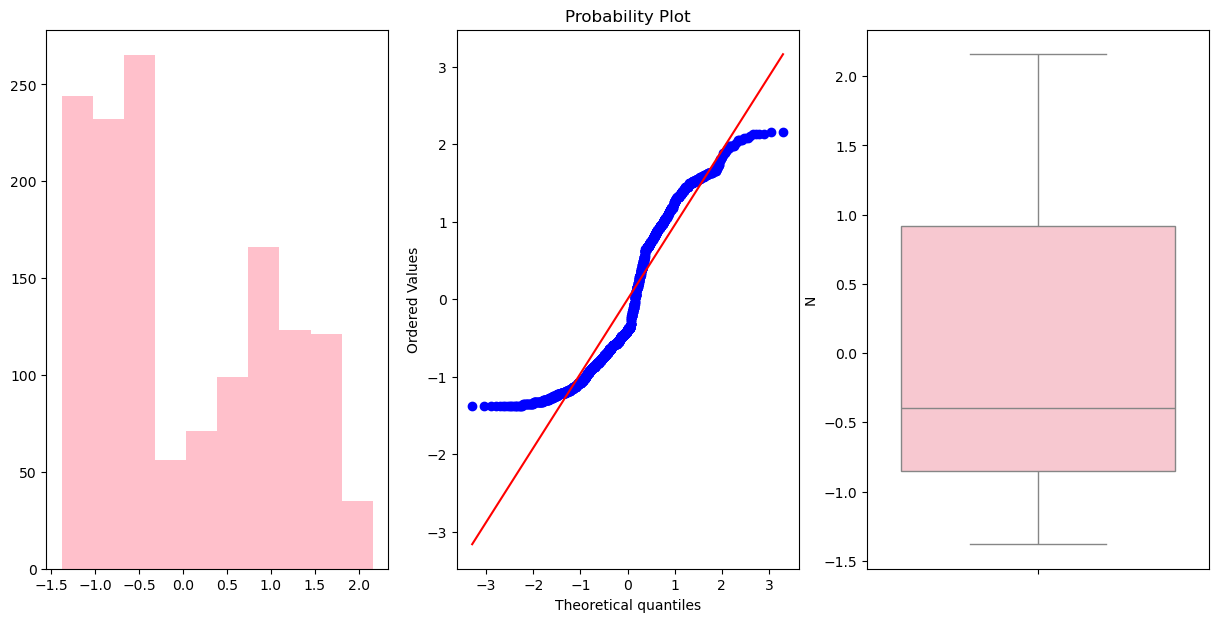

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for P are shown ↓


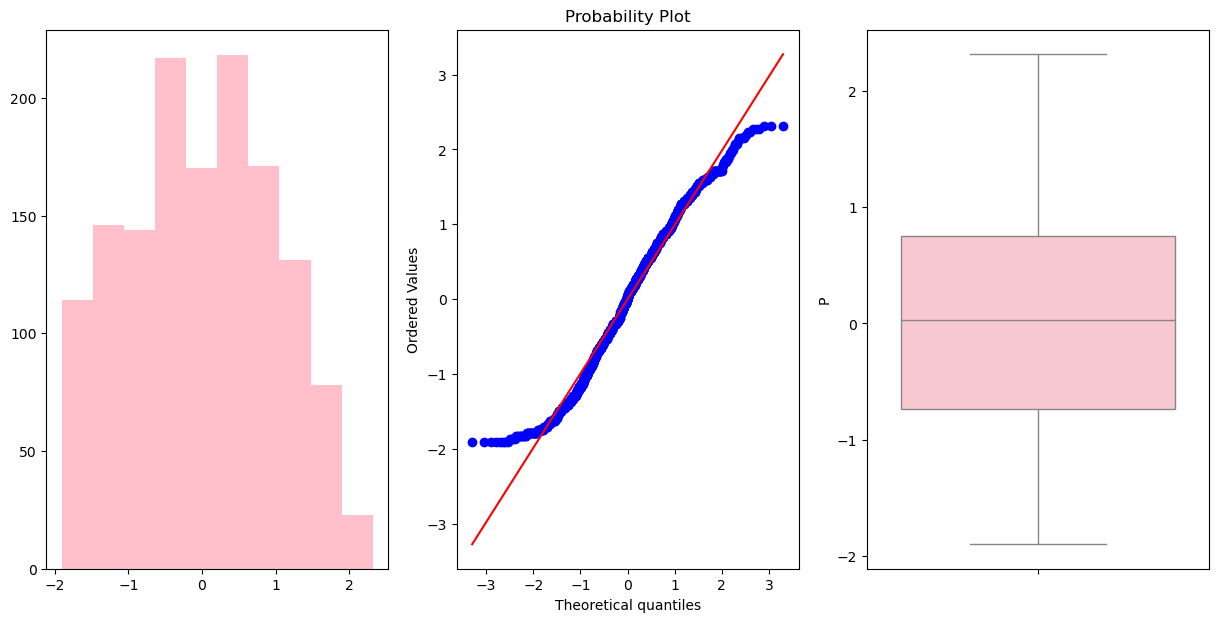

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for K are shown ↓


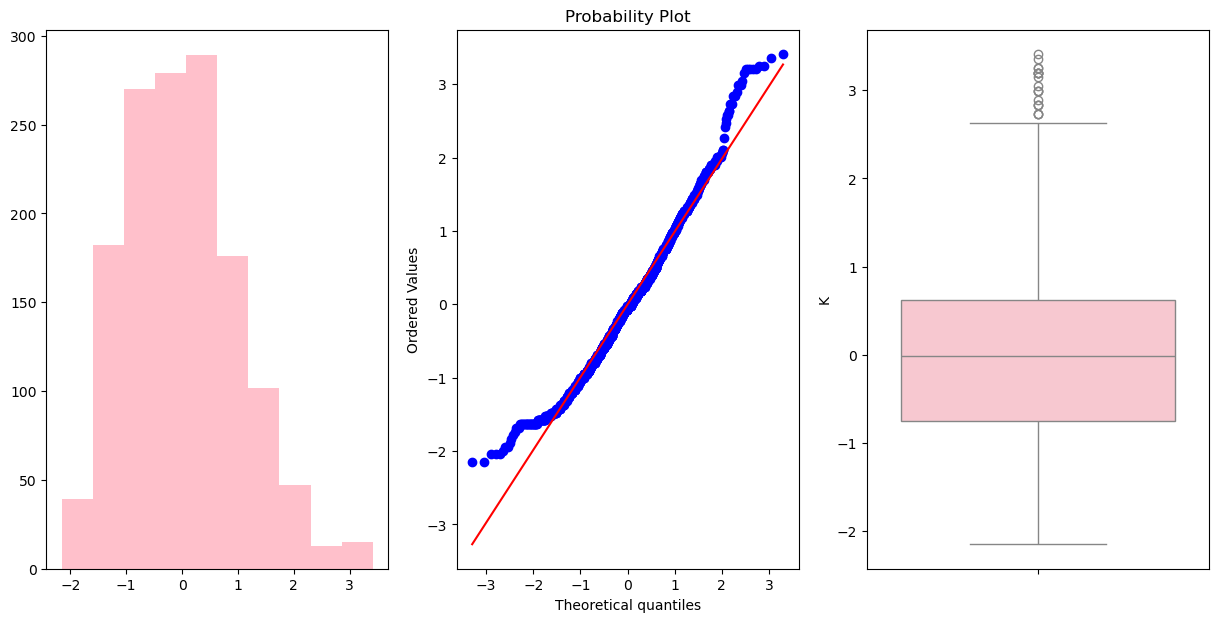

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for temperature are shown ↓


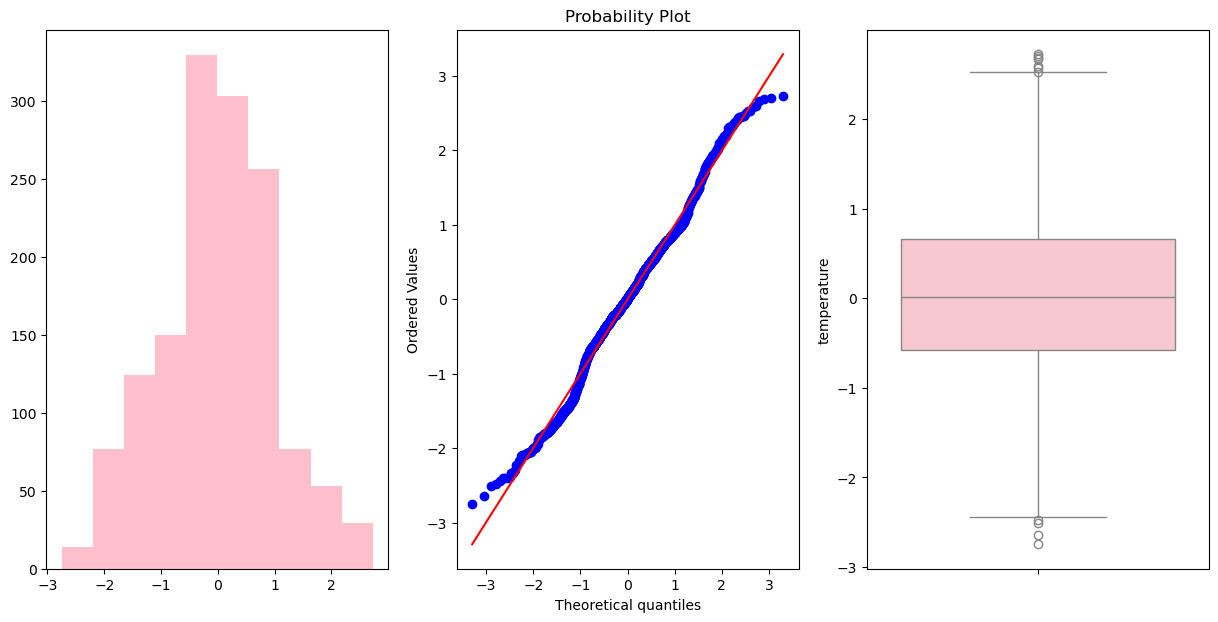

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for humidity are shown ↓


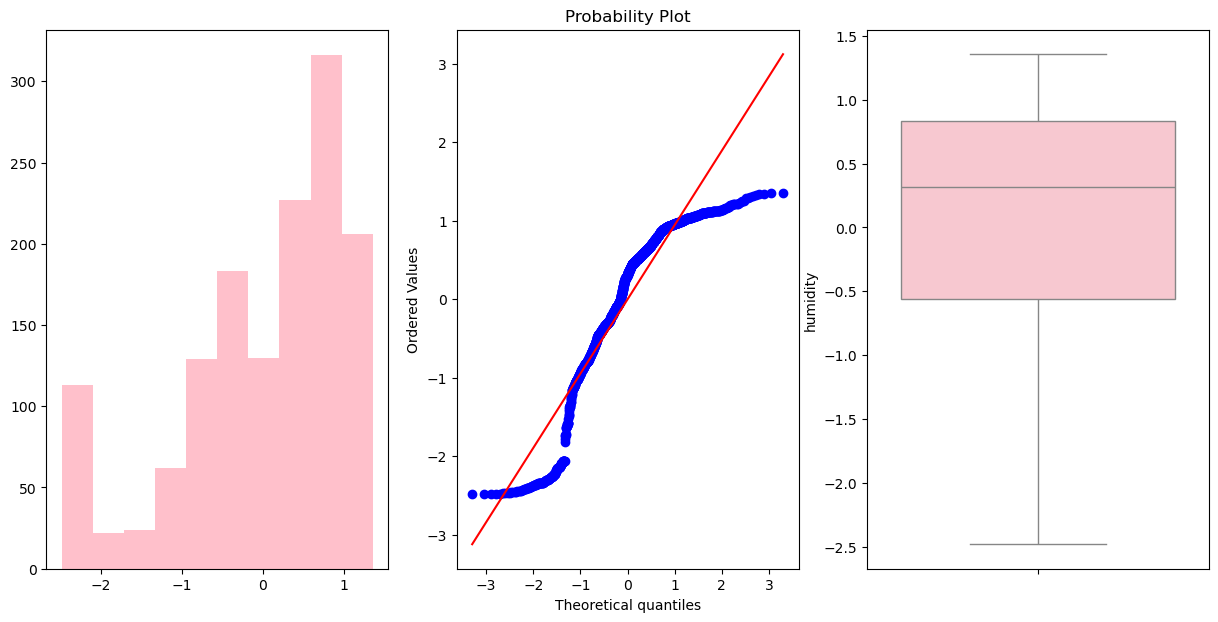

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for ph are shown ↓


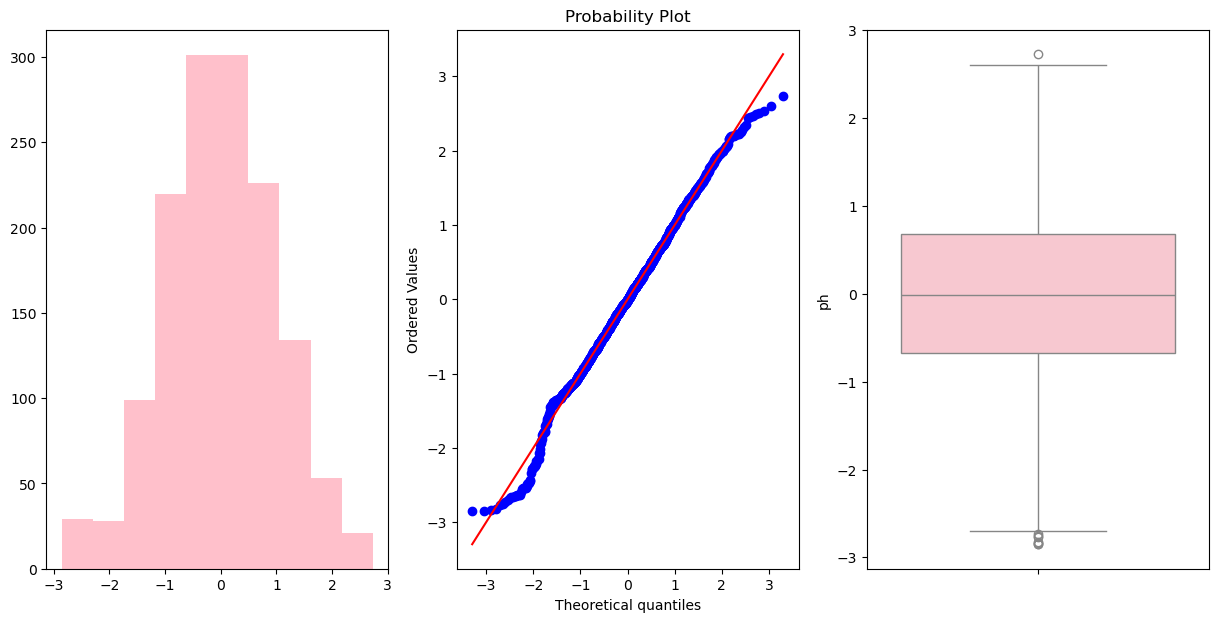

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for rainfall are shown ↓


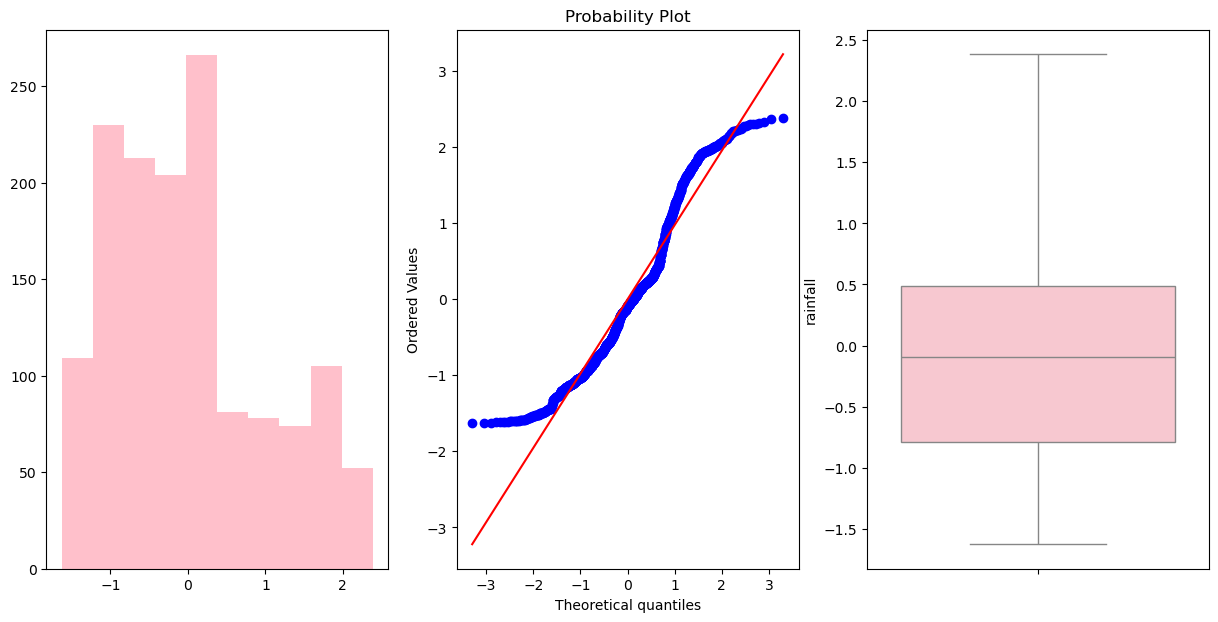

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [27]:
scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
for i in scaled_df.columns:
    print(f'Statistical plots for {i} are shown ↓')
    visualise(scaled_df, i)
    print("=>" * 50)

In [28]:
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train_imputed)
X_test_mm = mm.transform(X_test_imputed)

Statistical plots for N are shown ↓


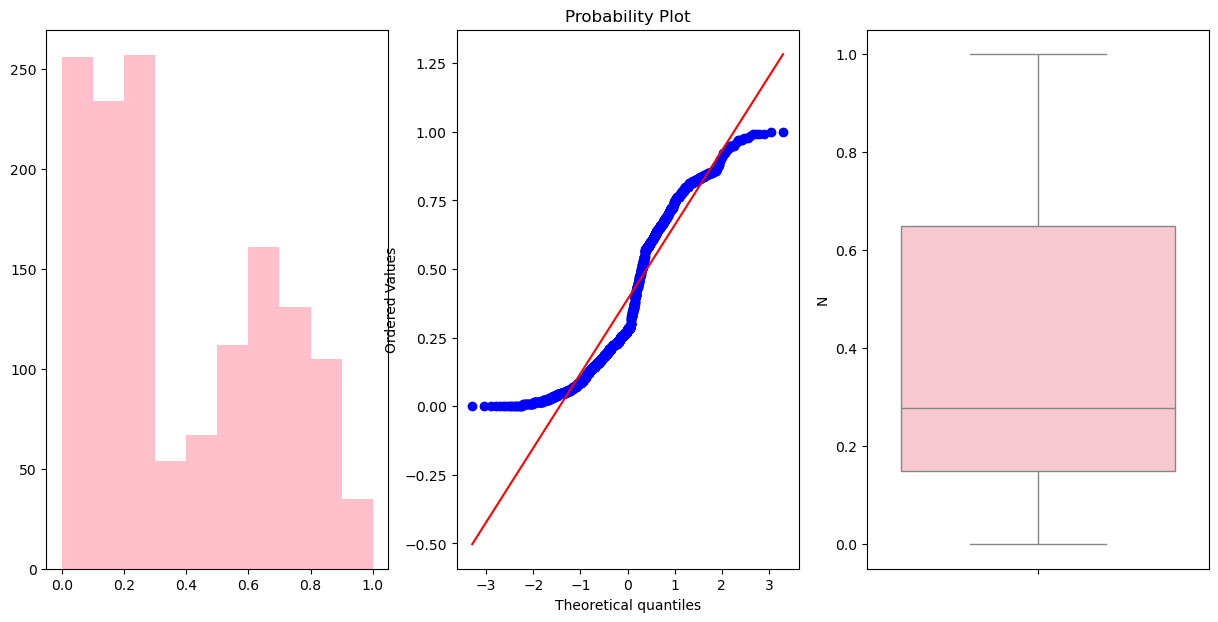

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for P are shown ↓


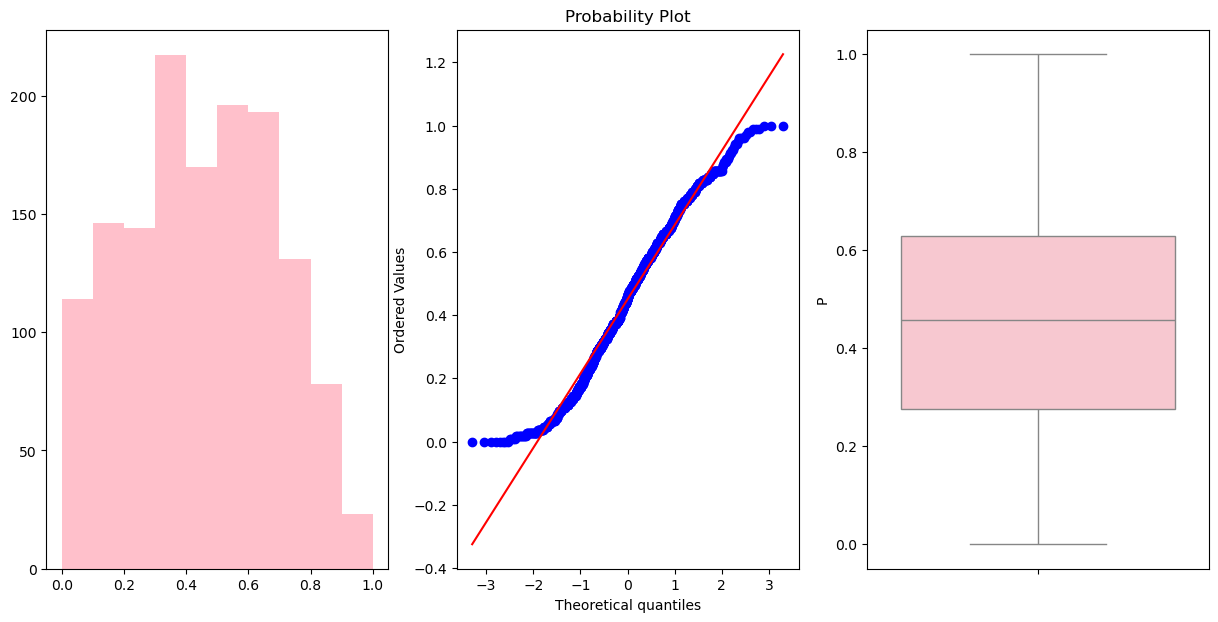

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for K are shown ↓


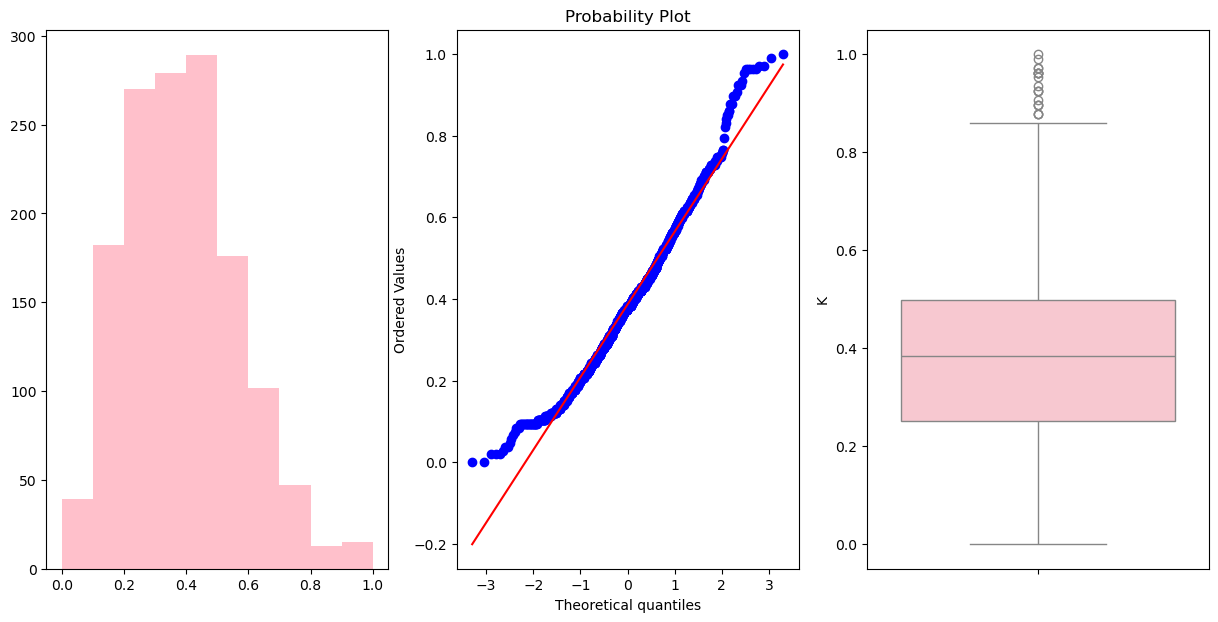

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for temperature are shown ↓


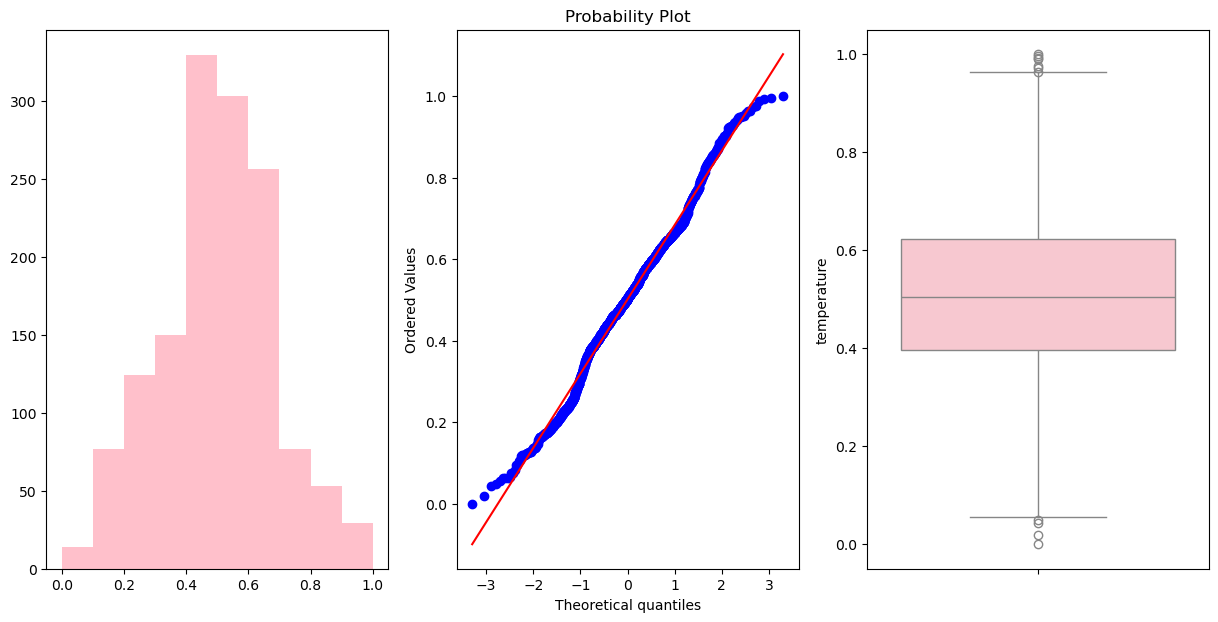

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for humidity are shown ↓


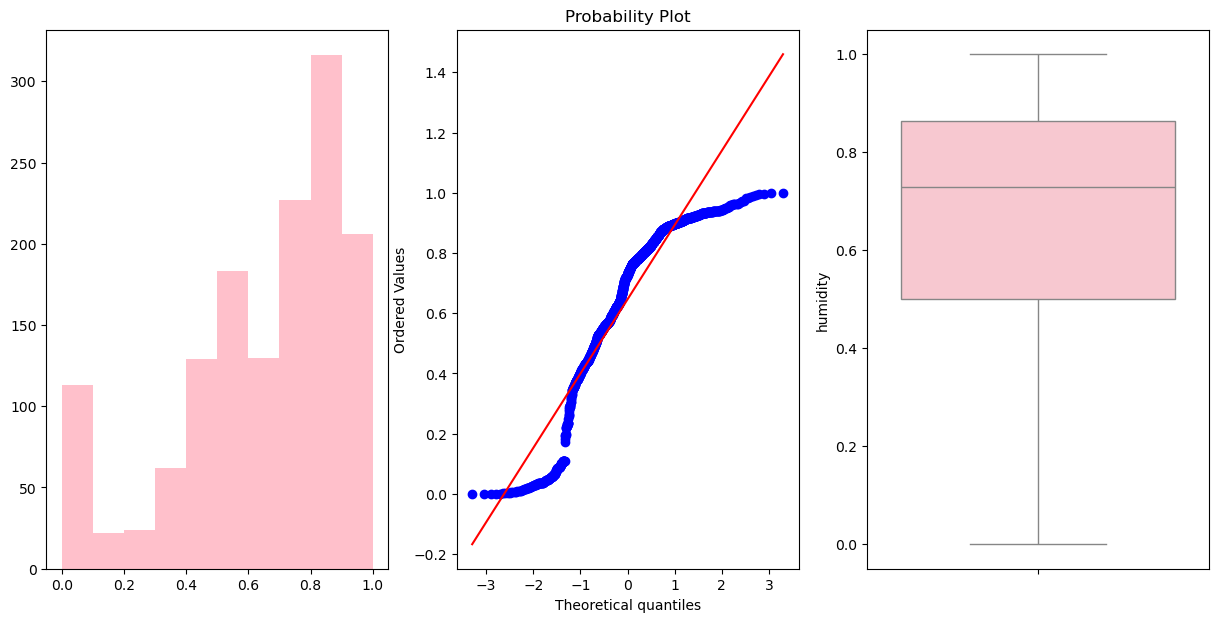

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for ph are shown ↓


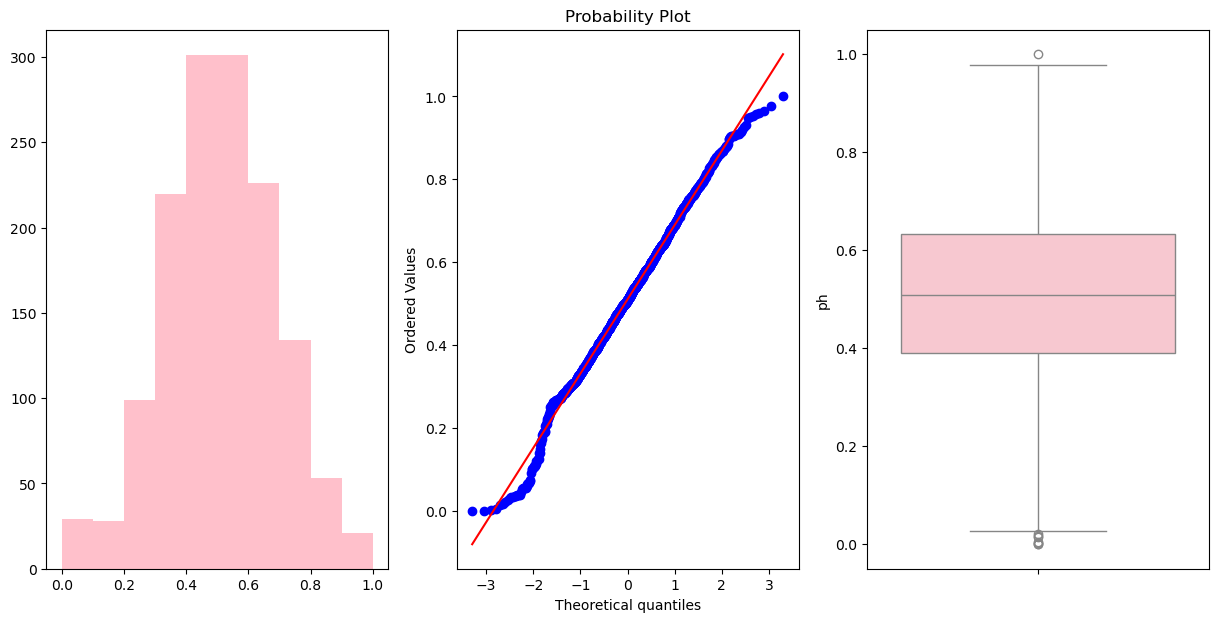

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Statistical plots for rainfall are shown ↓


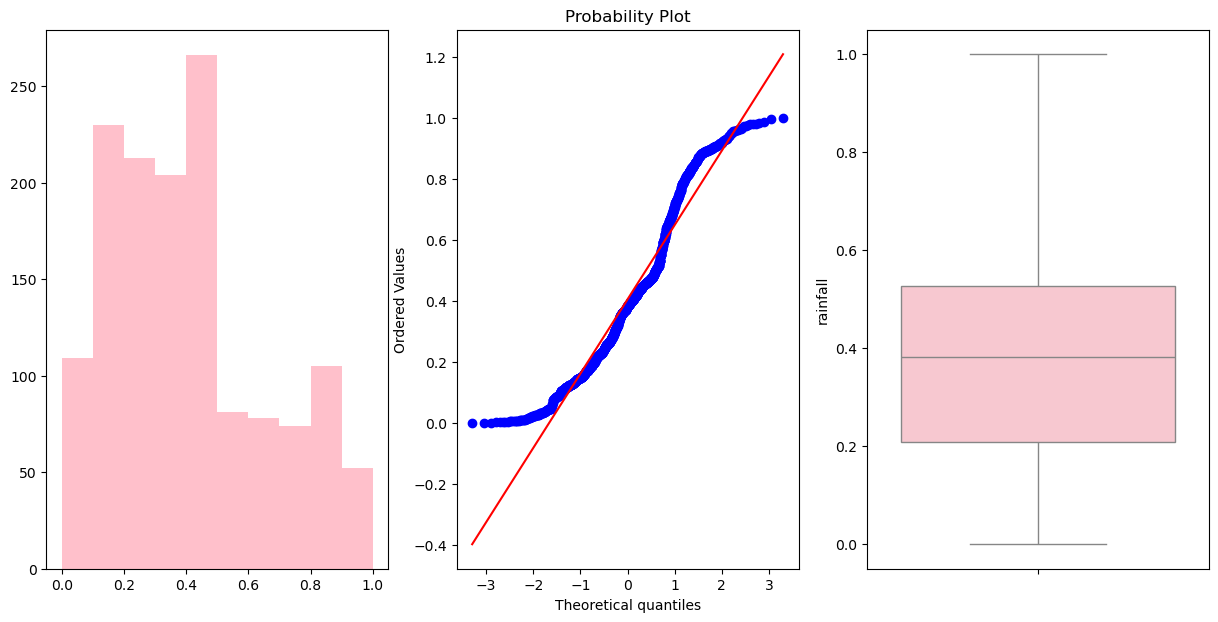

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [29]:
scaled_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
for i in scaled_mm.columns:
    print(f'Statistical plots for {i} are shown ↓')
    visualise(scaled_mm, i)
    print("=>" * 50)


In [30]:
X_train_scaled_mm = mm.fit_transform(X_train_imputed)
X_test_scaled_mm = mm.transform(X_test_imputed)

#MODEL Building

In [35]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearnex.linear_model import LogisticRegression
from sklearnex.neighbors import KNeighborsClassifier
from sklearnex.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearnex.svm import SVC 
from sklearn import tree

In [36]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.400387,-0.293325,0.811666,0.286433,-0.372591,0.623153,0.921096
1,-0.571348,-0.695242,0.240085,0.403277,1.033488,-0.953989,0.906179
2,-0.748298,1.434916,-1.370735,-1.497669,-0.604292,-2.472190,1.550682
3,-1.001085,-1.820608,1.071476,-1.421168,0.728048,-0.673255,0.259691
4,0.945372,0.108591,-0.175611,0.074186,0.463228,-1.143865,1.752924


In [37]:
X_train_scaled

array([[ 1.40038748, -0.2933251 ,  0.81166616, ..., -0.37259098,
         0.62315309,  0.92109563],
       [-0.57134778, -0.69524168,  0.24008479, ...,  1.03348753,
        -0.95398903,  0.90617881],
       [-0.74829838,  1.43491621, -1.37073545, ..., -0.60429183,
        -2.47219012,  1.55068196],
       ...,
       [-1.07692093,  0.47031641, -1.63054516, ..., -0.79225376,
         0.83363295,  1.50546539],
       [ 1.07176494, -1.09715826,  0.65578033, ...,  0.9368375 ,
        -0.08666708, -1.55958328],
       [ 0.08589731,  0.91242465,  0.1361609 , ..., -0.32276416,
         1.35092906, -0.79151554]])

[Text(0.41688829787234044, 0.96875, 'rainfall <= 30.393\ngini = 0.947\nsamples = 1412\nvalue = [26, 80, 47, 82, 78, 43, 77, 75, 78, 85, 76, 78\n84, 75, 67, 46, 72, 86, 76, 81]'),
 Text(0.39561170212765956, 0.90625, 'gini = 0.0\nsamples = 75\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75\n0, 0, 0, 0, 0, 0]'),
 Text(0.43816489361702127, 0.90625, 'N <= 60.5\ngini = 0.944\nsamples = 1337\nvalue = [26, 80, 47, 82, 78, 43, 77, 75, 78, 85, 76, 78\n84, 0, 67, 46, 72, 86, 76, 81]'),
 Text(0.24202127659574468, 0.84375, 'humidity <= 74.998\ngini = 0.912\nsamples = 816\nvalue = [0, 0, 47, 82, 78, 43, 77, 75, 78, 85, 0, 78, 0\n0, 67, 34, 72, 0, 0, 0]'),
 Text(0.11170212765957446, 0.78125, 'humidity <= 27.685\ngini = 0.85\nsamples = 481\nvalue = [0, 0, 47, 82, 78, 43, 0, 75, 78, 0, 0, 78, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(0.0425531914893617, 0.71875, 'K <= 49.5\ngini = 0.463\nsamples = 129\nvalue = [0, 0, 47, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.02127659574468085, 0.656

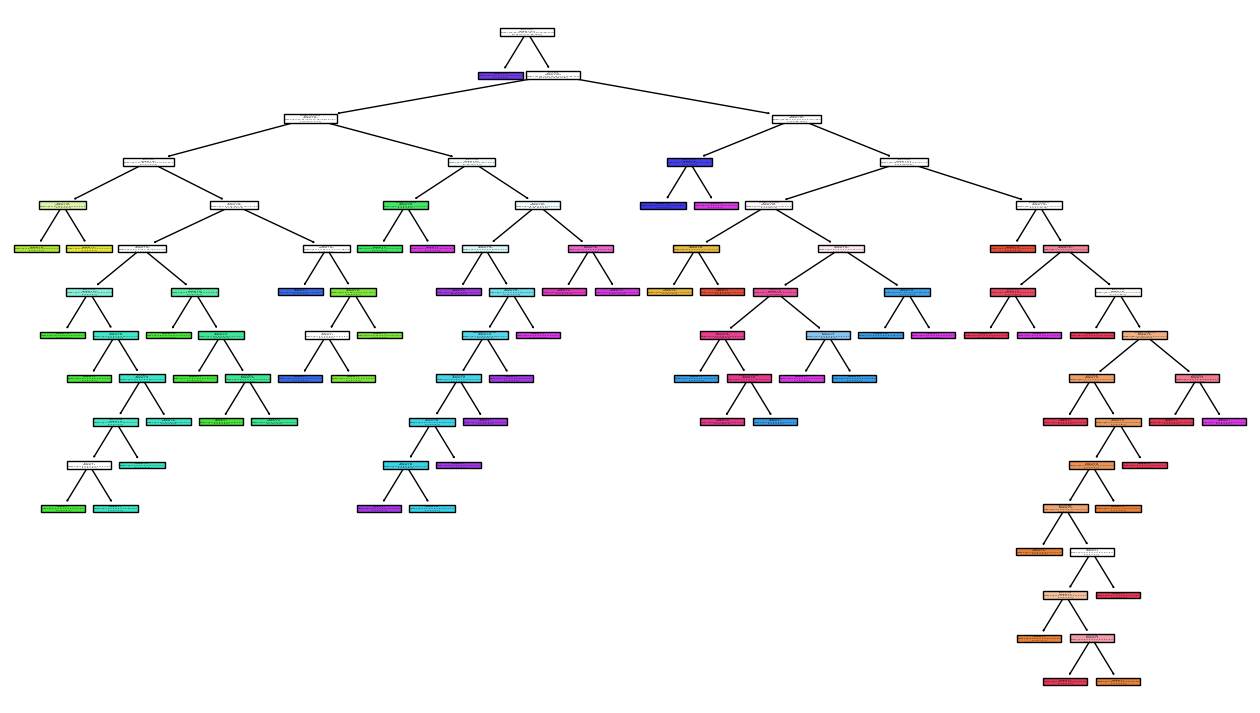

In [38]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns)

In [39]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00046617, 0.00069925, 0.00094429, 0.00094429,
       0.00101806, 0.00106232, 0.00137964, 0.00139996, 0.00140015,
       0.00202347, 0.00261646, 0.00270447, 0.00270591, 0.00275192,
       0.00383381, 0.00399084, 0.00410276, 0.00525367, 0.00538593,
       0.00666556, 0.0067954 , 0.00695619, 0.00851069, 0.0085606 ,
       0.01293413, 0.01545037, 0.01854236, 0.02529998, 0.03640663,
       0.04231724, 0.04343775, 0.04496764, 0.04562217, 0.04927509,
       0.05090289, 0.05173029, 0.05195574, 0.05407702])

In [40]:
alpha_list = []
for i in ccp_alpha:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

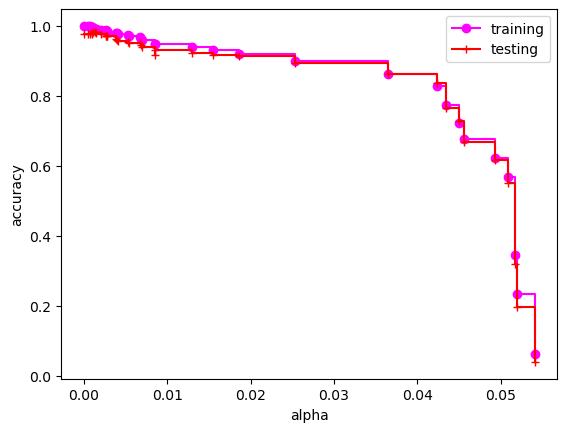

In [41]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score =  [clf.score(X_test,y_test) for clf in alpha_list]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,marker = 'o',label = 'training',color = 'magenta',drawstyle = 'steps-post')
plt.plot(ccp_alpha,test_score,marker = '+',label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.4, 0.9285714285714286, 'rainfall <= 30.393\ngini = 0.947\nsamples = 1412\nvalue = [26, 80, 47, 82, 78, 43, 77, 75, 78, 85, 76, 78\n84, 75, 67, 46, 72, 86, 76, 81]'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 75\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75\n0, 0, 0, 0, 0, 0]'),
 Text(0.4666666666666667, 0.7857142857142857, 'N <= 60.5\ngini = 0.944\nsamples = 1337\nvalue = [26, 80, 47, 82, 78, 43, 77, 75, 78, 85, 76, 78\n84, 0, 67, 46, 72, 86, 76, 81]'),
 Text(0.26666666666666666, 0.6428571428571429, 'humidity <= 74.998\ngini = 0.912\nsamples = 816\nvalue = [0, 0, 47, 82, 78, 43, 77, 75, 78, 85, 0, 78, 0\n0, 67, 34, 72, 0, 0, 0]'),
 Text(0.13333333333333333, 0.5, 'humidity <= 27.685\ngini = 0.85\nsamples = 481\nvalue = [0, 0, 47, 82, 78, 43, 0, 75, 78, 0, 0, 78, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.463\nsamples = 129\nvalue = [0, 0, 47, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.

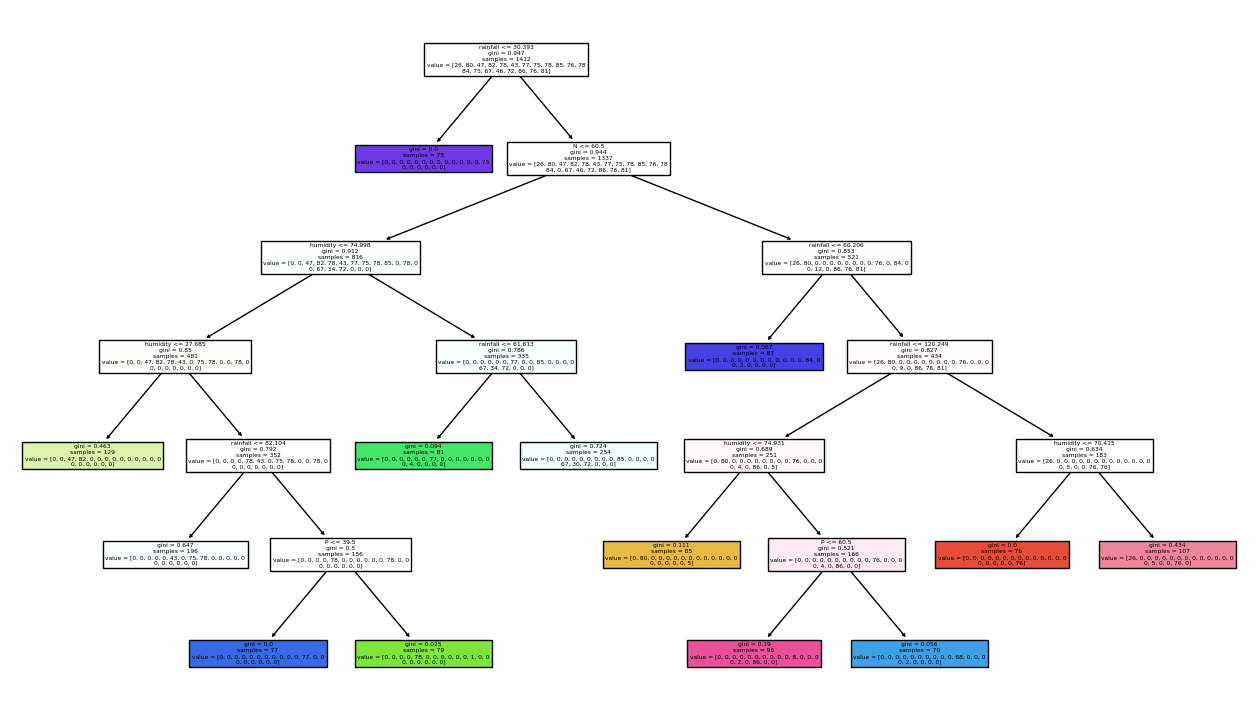

In [42]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.045)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns)

In [43]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [44]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ua4c0cc60a319152129bfdb48913aa66/.local/lib/python3.9/site-packages/daal4py/sklearn/_n_jobs_support.py", line 128, in method_wrapper
    result = method(self, *args, **kwargs)
  File "/home/ua4c0cc60a319152129bfdb48913aa66/.local/lib/python3.9/site-packages/sklearne

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/p

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_cons

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [45]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

,model_name,best_estimator,best_score
0,RandomForest,"(DecisionTreeClassifier(ccp_alpha=0.03, max_de...",0.902982
1,logistic,"LogisticRegression(C=0.75, max_iter=139, penal...",0.902291
2,D-tree,"DecisionTreeClassifier(ccp_alpha=0.03, criteri...",0.774095
3,SVM,"SVC(kernel='linear', max_iter=56, tol=0.5)",0.966724


In [46]:
for i in scores_df['best_estimator']:
    print(i)

RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=1066)
LogisticRegression(C=0.75, max_iter=139, penalty='l1', solver='liblinear',
                   tol=1e-10)
DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5)
SVC(kernel='linear', max_iter=56, tol=0.5)


In [47]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')

svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)

rf_val = cross_val_score(estimator=rf,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
lr_val = cross_val_score(estimator = lr,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
svc_val = cross_val_score(estimator=svc,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)

In [48]:
score_list = [rf_val,lr_val,svc_val]
model_name = ['rf','lr','svc']
for i,j in zip(score_list,model_name):
    print(f' Model : {j} gave {i.mean()} accuracy')

 Model : rf gave 0.8958752515090543 accuracy
 Model : lr gave 0.9101006036217303 accuracy
 Model : svc gave 0.8725150905432594 accuracy


In [49]:
from sklearn import metrics

In [50]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

0.8902266288951841

In [51]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,min_samples_split=5, n_estimators=800)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.8987252124645893

In [52]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

0.9674220963172805

In [53]:
svc.score(X_test,y_test)

0.9548022598870056

<Axes: >

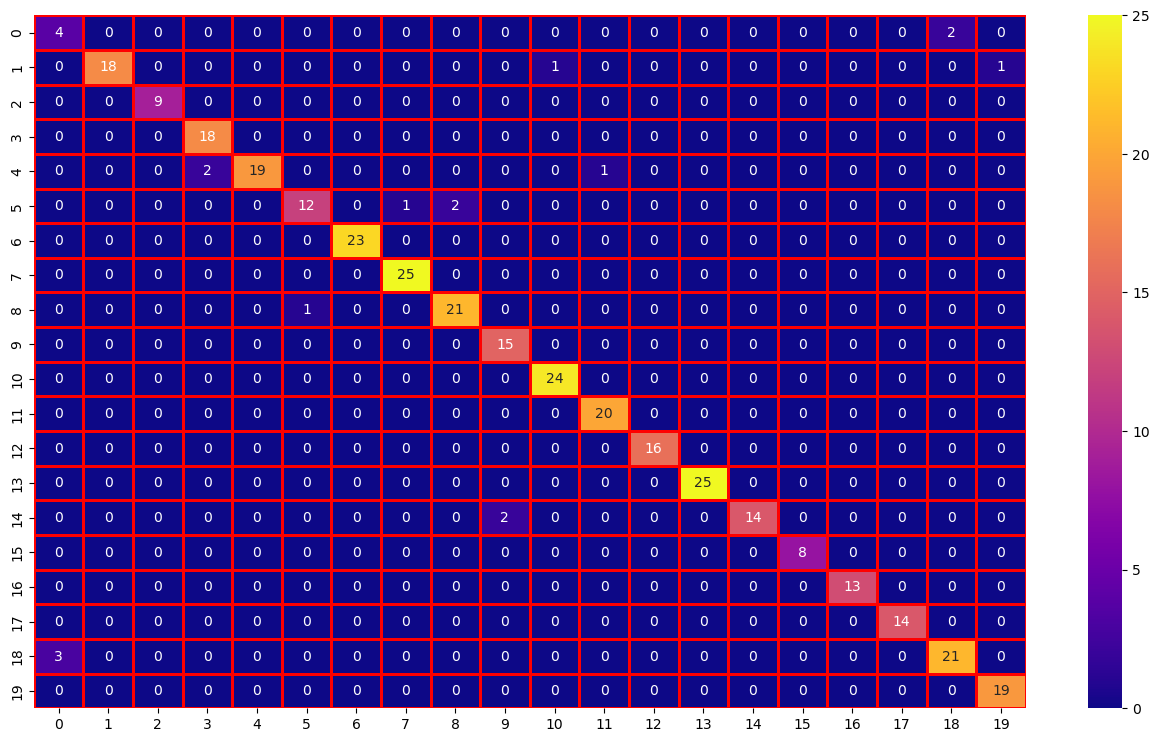

In [54]:
y_pred = svc.predict(X_test)
cn = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(16,9))
sn.heatmap(cn,annot=True,linecolor='red',linewidths=2,cmap='plasma')

In [55]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      0.67      0.62         6
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00         9
           4       0.90      1.00      0.95        18
           5       1.00      0.86      0.93        22
           6       0.92      0.80      0.86        15
           7       1.00      1.00      1.00        23
           8       0.96      1.00      0.98        25
           9       0.91      0.95      0.93        22
          10       0.88      1.00      0.94        15
          11       0.96      1.00      0.98        24
          12       0.95      1.00      0.98        20
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        25
          17       1.00      0.88      0.93        16
          18       1.00      1.00      1.00         8
          19       1.00      1.00      1.00        13
          20       1.00    

In [56]:
train = np.array(train)
predict_list = []
for i in range(0,len(train)):
    predict_list.append(svc.predict([train[i]]))

/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/sklearn/base.py:465: U

In [57]:
predict_list = np.array(predict_list)

In [58]:
temp['SVM_pred'] = predict_list

In [60]:
original_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map_new = {i+1:original_labels[i] for i in range(len(original_labels))}
labels_map_new

{1: 'rice',
 2: 'maize',
 3: 'chickpea',
 4: 'kidneybeans',
 5: 'pigeonpeas',
 6: 'mothbeans',
 7: 'mungbean',
 8: 'blackgram',
 9: 'lentil',
 10: 'pomegranate',
 11: 'banana',
 12: 'mango',
 13: 'grapes',
 14: 'watermelon',
 15: 'muskmelon',
 16: 'apple',
 17: 'orange',
 18: 'papaya',
 19: 'coconut',
 20: 'cotton',
 21: 'jute',
 22: 'coffee'}

[CV] END ......C=0.5, kernel=sigmoid, max_iter=1, tol=0.0001; total time=   0.5s
[CV] END .........C=0.75, kernel=rbf, max_iter=194, tol=0.75; total time=   0.5s
[CV] END ....C=0.5, kernel=sigmoid, max_iter=111, tol=0.0001; total time=   0.8s


In [61]:
temp['Predicted_labels'] = temp['SVM_pred'].map(labels_map_new)
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label,SVM_pred,Predicted_labels
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1,1,rice
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1,21,jute
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1,1,rice
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1,1,rice
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1,21,jute


[CV] END ....C=0.5, kernel=sigmoid, max_iter=111, tol=0.0001; total time=   0.9s
[CV] END ..........C=0.25, kernel=rbf, max_iter=250, tol=0.5; total time=   0.6s
[CV] END ..........C=1.0, kernel=rbf, max_iter=139, tol=0.75; total time=   0.4s
[CV] END ..........C=0.25, kernel=rbf, max_iter=250, tol=0.5; total time=   0.7s
[CV] END ..........C=0.5, kernel=rbf, max_iter=222, tol=0.75; total time=   1.2s
[CV] END ..........C=1.0, kernel=rbf, max_iter=139, tol=0.75; total time=   0.5s
[CV] END ..........C=0.25, kernel=rbf, max_iter=250, tol=0.5; total time=   0.6s
[CV] END ......C=0.5, kernel=sigmoid, max_iter=1, tol=0.0001; total time=   0.6s
[CV] END ....C=0.5, kernel=sigmoid, max_iter=111, tol=0.0001; total time=   1.1s
[CV] END ..........C=0.25, kernel=rbf, max_iter=250, tol=0.5; total time=   0.5s
[CV] END ..........C=0.5, kernel=rbf, max_iter=222, tol=0.75; total time=   1.0s
[CV] END ....C=0.25, kernel=sigmoid, max_iter=84, tol=0.0001; total time=   1.3s
[CV] END ..........C=1.0, ke

In [62]:
plt.figure(figsize=(25,10))
sn.countplot(data=temp,x = 'Original_labels')

ValueError: Could not interpret value `Original_labels` for `x`. An entry with this name does not appear in `data`.

<Figure size 2500x1000 with 0 Axes>

<Axes: xlabel='Predicted_labels', ylabel='count'>

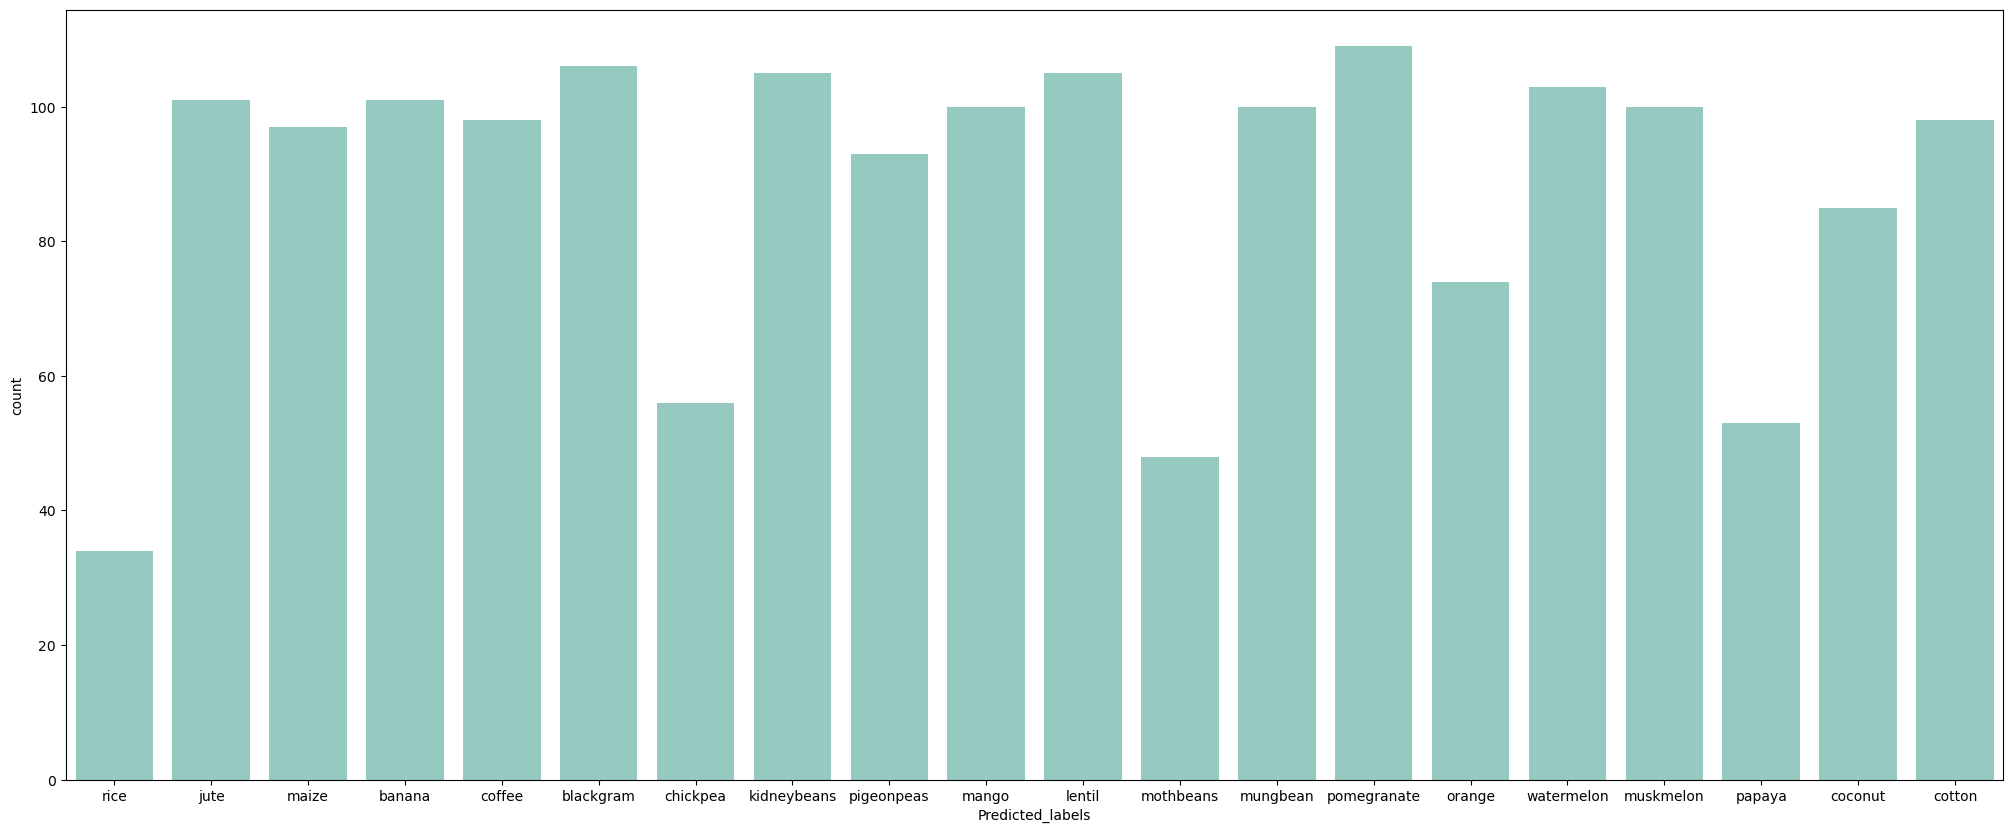

In [63]:
plt.figure(figsize=(25,10))
sn.countplot(data = temp,x = 'Predicted_labels')

In [ ]:
a = temp[temp['Original_labels']!=temp['Predicted_labels']].style.background_gradient('plasma')
a

[CV] END ccp_alpha=0.045, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=933; total time=   2.4s
[CV] END ccp_alpha=0.05, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1066; total time=   0.0s
[CV] END ccp_alpha=0.045, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=933; total time=   2.5s
[CV] END ccp_alpha=0.045, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=933; total time=   2.4s
[CV] END ccp_alpha=0.05, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1066; total time=   0.0s
[CV] END ccp_alpha=0.03, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1066; total time=   3.0s
[CV] END ccp_alpha=0.03, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1066; total time=   2.9s
[CV] END ccp_alpha=0.05, max_depth=1, m

In [ ]:
tru = temp['Original_labels'].values
tru = list(tru.flatten())
predict = temp['Predicted_labels'].values
predict = list(predict.flatten())

In [ ]:
count = 0
for i,j in zip(tru,predict):
    if i!=j:
        
        count+=1

In [ ]:
print(f'Total Values after Preprocessing : {temp.shape[0]}\nMisclassified values are : {temp.shape[0]-count}')

In [ ]:
# 21st label is jute!

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])


data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

Saving Model

In [ ]:
import pickle
svm_model_pkl = open('crop_classification_model.pkl', 'wb')
pickle.dump(svc, svm_model_pkl)
svm_model_pkl.close()

In [ ]:
file = open('cropmodel2.pkl','wb')
pickle.dump(svc,file)
file.close()